In [1]:
# library importation 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
st_words = stopwords.words('english')
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# loading BBC news dataset.... 
data = pd.read_csv('bbc_text.csv')
data

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [115]:
# DATA EXPLORATION

In [3]:
data.head(3)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...


In [4]:
data.sample(3)

,category,text
1986,politics,uk set to cut back on embassies nine overseas ...
2120,sport,ferguson rues failure to cut gap boss sir alex...
93,sport,south africa sweep top awards south africa s s...


In [5]:
data.tail(3)

,category,text
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [6]:
row , column = data.shape
print('No of Datapoint (rows) : ',  row)
print('No of features  (columns) : ', column)

No of Datapoint (rows) :  2225
No of features  (columns) :  2


In [7]:
new_classes = data.category.unique()
classes_size = len(new_classes)
print("Label  Class: " , new_classes)
#

Label  Class:  ['tech' 'business' 'sport' 'entertainment' 'politics']


[401, 510, 511, 386, 417]


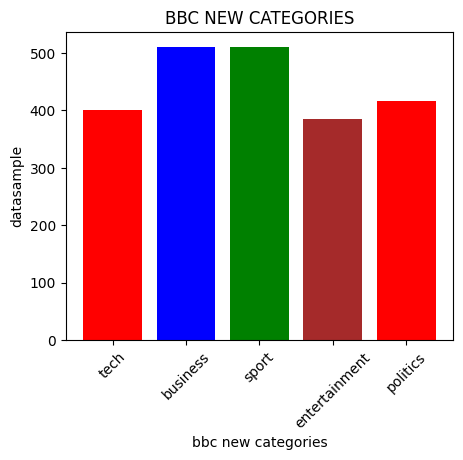

In [8]:
len(data[data['category']== new_classes[0]])
class_len = []
for new_class in new_classes:
  ln = len(data[data['category']== new_class])
  class_len.append(ln)

class_len = np.array(class_len) 
print(list(class_len))

plt.figure(figsize=(5,4))

# visualizing the class label count
plt.xlabel('bbc new categories')
plt.ylabel('datasample')
plt.title('BBC NEW CATEGORIES')
plt.xticks(rotation=45)
plt.bar(new_classes, class_len, color=['red', 'blue', 'green', 'brown'])
plt.show()

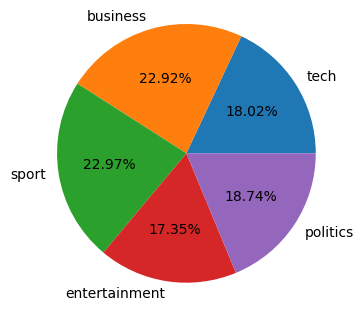

In [9]:
# pie chart 
plt.figure(figsize=(3.5,3.5))
plt.pie(class_len,labels=new_classes, radius=1.2, autopct='%0.2f%%')
plt.show()

In [10]:
ps = PorterStemmer()


def dataset_cleaning(text):
    #  removeing punctuation from the dataset
    text = ''.join([token for token in text if not token in string.punctuation])
    # tokenizing the dataset e.g ['tv' , 'future' , 'in' , 'the']
    token = word_tokenize(text)
    # removing stopword (words that had less meaning to the dataset)     
    text  = [ps.stem(t.lower()) for t in token if not t in st_words ]
    return text 

data['stem_clean_text'] = data["text"].apply(lambda x: dataset_cleaning(x))

In [124]:
# lemmatization techniques......

In [11]:
lemmer = WordNetLemmatizer()


def dataset_cleaning(text):
    #  removeing punctuation from the dataset
    text = ''.join([token for token in text if not token in string.punctuation])
    # tokenizing the dataset e.g ['tv' , 'future' , 'in' , 'the']
    token = word_tokenize(text)
    # removing stopword (words that had less meaning to the dataset)     
    text  = [lemmer.lemmatize(t.lower()) for t in token if not t in st_words ]
    return text 

data['lem_clean_text'] = data["text"].apply(lambda x: dataset_cleaning(x))

In [12]:
data

,category,text,stem_clean_text,lem_clean_text
0,tech,tv future in the hands of viewers with home th...,"[tv, futur, hand, viewer, home, theatr, system...","[tv, future, hand, viewer, home, theatre, syst..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, book, alon, former, wor...","[worldcom, bos, left, book, alone, former, wor..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tiger, wari, farrel, gambl, leicest, say, rus...","[tiger, wary, farrell, gamble, leicester, say,..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yead, face, newcastl, fa, cup, premiership, s...","[yeading, face, newcastle, fa, cup, premiershi..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, twelv, raid, box, offic, ocean, twelv,...","[ocean, twelve, raid, box, office, ocean, twel..."
...,...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,"[car, pull, us, retail, figur, us, retail, sal...","[car, pull, u, retail, figure, u, retail, sale..."
2221,politics,kilroy unveils immigration policy ex-chatshow ...,"[kilroy, unveil, immigr, polici, exchatshow, h...","[kilroy, unveils, immigration, policy, exchats..."
2222,entertainment,rem announce new glasgow concert us band rem h...,"[rem, announc, new, glasgow, concert, us, band...","[rem, announce, new, glasgow, concert, u, band..."
2223,politics,how political squabbles snowball it s become c...,"[polit, squabbl, snowbal, becom, commonplac, a...","[political, squabble, snowball, become, common..."


In [13]:
clean_dataset = data.drop(columns=['text'])
clean_dataset.head()

,category,stem_clean_text,lem_clean_text
0,tech,"[tv, futur, hand, viewer, home, theatr, system...","[tv, future, hand, viewer, home, theatre, syst..."
1,business,"[worldcom, boss, left, book, alon, former, wor...","[worldcom, bos, left, book, alone, former, wor..."
2,sport,"[tiger, wari, farrel, gambl, leicest, say, rus...","[tiger, wary, farrell, gamble, leicester, say,..."
3,sport,"[yead, face, newcastl, fa, cup, premiership, s...","[yeading, face, newcastle, fa, cup, premiershi..."
4,entertainment,"[ocean, twelv, raid, box, offic, ocean, twelv,...","[ocean, twelve, raid, box, office, ocean, twel..."


In [14]:
from nltk.probability import FreqDist
import nltk

word_list = []

news = clean_dataset['lem_clean_text']
for new in news:
    [word_list.append(w) for w in new]

# f_distribution = nltk.FreqDist(clean_dataset['clean_text'])
f_distribution = nltk.FreqDist(word_list)

sort_freq = sorted(f_distribution, key=f_distribution.__getitem__ , reverse=True)
print('Num of word ', len(sort_freq))

Num of word  29961


<Axes: title={'center': 'word count frequency'}, xlabel='Samples', ylabel='Counts'>

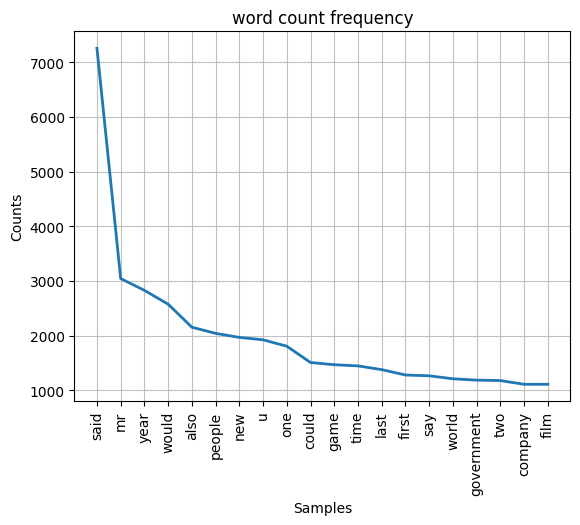

In [15]:
f_distribution.plot(20, title='word count frequency', cumulative=False)

In [16]:
clean_data = clean_dataset
clean_data

,category,stem_clean_text,lem_clean_text
0,tech,"[tv, futur, hand, viewer, home, theatr, system...","[tv, future, hand, viewer, home, theatre, syst..."
1,business,"[worldcom, boss, left, book, alon, former, wor...","[worldcom, bos, left, book, alone, former, wor..."
2,sport,"[tiger, wari, farrel, gambl, leicest, say, rus...","[tiger, wary, farrell, gamble, leicester, say,..."
3,sport,"[yead, face, newcastl, fa, cup, premiership, s...","[yeading, face, newcastle, fa, cup, premiershi..."
4,entertainment,"[ocean, twelv, raid, box, offic, ocean, twelv,...","[ocean, twelve, raid, box, office, ocean, twel..."
...,...,...,...
2220,business,"[car, pull, us, retail, figur, us, retail, sal...","[car, pull, u, retail, figure, u, retail, sale..."
2221,politics,"[kilroy, unveil, immigr, polici, exchatshow, h...","[kilroy, unveils, immigration, policy, exchats..."
2222,entertainment,"[rem, announc, new, glasgow, concert, us, band...","[rem, announce, new, glasgow, concert, u, band..."
2223,politics,"[polit, squabbl, snowbal, becom, commonplac, a...","[political, squabble, snowball, become, common..."


In [17]:
# creating a document version of the lemmatization

def return_doc(documents): 
    return ' '.join(documents)

clean_data['doc'] = clean_data['lem_clean_text'].apply(lambda x: return_doc(x))
clean_data

,category,stem_clean_text,lem_clean_text,doc
0,tech,"[tv, futur, hand, viewer, home, theatr, system...","[tv, future, hand, viewer, home, theatre, syst...",tv future hand viewer home theatre system plas...
1,business,"[worldcom, boss, left, book, alon, former, wor...","[worldcom, bos, left, book, alone, former, wor...",worldcom bos left book alone former worldcom b...
2,sport,"[tiger, wari, farrel, gambl, leicest, say, rus...","[tiger, wary, farrell, gamble, leicester, say,...",tiger wary farrell gamble leicester say rushed...
3,sport,"[yead, face, newcastl, fa, cup, premiership, s...","[yeading, face, newcastle, fa, cup, premiershi...",yeading face newcastle fa cup premiership side...
4,entertainment,"[ocean, twelv, raid, box, offic, ocean, twelv,...","[ocean, twelve, raid, box, office, ocean, twel...",ocean twelve raid box office ocean twelve crim...
...,...,...,...,...
2220,business,"[car, pull, us, retail, figur, us, retail, sal...","[car, pull, u, retail, figure, u, retail, sale...",car pull u retail figure u retail sale fell 03...
2221,politics,"[kilroy, unveil, immigr, polici, exchatshow, h...","[kilroy, unveils, immigration, policy, exchats...",kilroy unveils immigration policy exchatshow h...
2222,entertainment,"[rem, announc, new, glasgow, concert, us, band...","[rem, announce, new, glasgow, concert, u, band...",rem announce new glasgow concert u band rem an...
2223,politics,"[polit, squabbl, snowbal, becom, commonplac, a...","[political, squabble, snowball, become, common...",political squabble snowball become commonplace...


In [18]:
# extracting the doc from data fram ........
documents = clean_data['doc']
documents

0       tv future hand viewer home theatre system plas...
1       worldcom bos left book alone former worldcom b...
2       tiger wary farrell gamble leicester say rushed...
3       yeading face newcastle fa cup premiership side...
4       ocean twelve raid box office ocean twelve crim...
                              ...                        
2220    car pull u retail figure u retail sale fell 03...
2221    kilroy unveils immigration policy exchatshow h...
2222    rem announce new glasgow concert u band rem an...
2223    political squabble snowball become commonplace...
2224    souness delight euro progress bos graeme soune...
Name: doc, Length: 2225, dtype: object

In [19]:
# documents

In [20]:
# Tokenize documents
tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]

In [21]:
# Compute TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [105]:

# Train Word2Vec model (extract semantic relationship)............................
w2v_model = Word2Vec(sentences=tokenized_docs, vector_size=20, window=5, min_count=1, workers=4)


In [106]:
w2v_model.wv['euro']

array([ 0.22780621,  1.549171  , -0.89489084,  2.2540524 , -0.07405952,
        0.4907664 , -0.8862073 ,  3.3461654 , -0.49168274,  1.9998767 ,
        2.6859927 , -1.804485  ,  0.16740035, -1.3290266 ,  0.57757133,
        3.037842  ,  2.1029568 , -0.58393407,  0.28042626, -2.3211708 ],
      dtype=float32)

In [30]:
tfidf_vectorizer.get_feature_names_out()[10000:10200]

array(['emmissions', 'emmy', 'emoticon', 'emotion', 'emotional',
       'emotionally', 'emotive', 'empathy', 'emperor', 'emphasis',
       'emphasise', 'emphasised', 'emphatic', 'emphatically', 'emphysema',
       'empire', 'empirebuilding', 'employ', 'employed', 'employee',
       'employer', 'employeremployee', 'employing', 'employment',
       'empower', 'empowerment', 'empress', 'empty', 'emptyhanded',
       'emulate', 'emulating', 'emulator', 'emups', 'en', 'enable',
       'enabled', 'enablement', 'enabler', 'enables', 'enabling',
       'enacted', 'enarsa', 'encampment', 'encapsulate', 'encarta',
       'encased', 'enchanting', 'enclosed', 'enclosure', 'encoder',
       'encoding', 'encompass', 'encompassed', 'encompasses', 'encore',
       'encounter', 'encountered', 'encountering', 'encourage',
       'encouraged', 'encouragement', 'encourages', 'encouraging',
       'encroachment', 'encrypted', 'encryption', 'encyclopaedia', 'end',
       'endacott', 'endangered', 'endangeri

In [31]:
tfidf_matrix.toarray()

array([[0.        , 0.01930694, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02380416, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02588097, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0160233 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [33]:
tfidf_matrix.shape

(2225, 29599)

In [34]:
tfidf_matrix[:14 , 1].toarray()

array([[0.01930694],
       [0.02380416],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

#### Enhancing TF-IDF with W2-vec 

In [107]:
# Create a dictionary of word TF-IDF scores
tfidf_dict = {word: tfidf_matrix[:, idx].sum() for idx, word in enumerate(tfidf_feature_names)}

# Function to compute document vectors
def document_vector(doc):
    # Compute the weighted average Word2Vec vector of a document using TF-IDF
    vectors = []
    for word in doc:
        if word in w2v_model.wv and word in tfidf_dict:
            vectors.append(w2v_model.wv[word] * tfidf_dict[word])  # Weight Word2Vec by TF-IDF
    return np.mean(vectors, axis=0) if vectors else np.zeros(w2v_model.vector_size)

# Compute document vectors
doc_vectors = np.array([document_vector(doc) for doc in tokenized_docs])

# Convert to DataFrame
feature_table= pd.DataFrame(doc_vectors)

# Print the enhanced document representations
feature_table 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-5.289919,-8.190187,13.657852,6.673470,-0.653534,-2.791670,7.325127,23.124979,-11.690960,10.610583,12.362040,-10.083072,8.930740,-7.258519,11.280698,15.821002,15.275602,-6.995349,-9.259321,-19.383577
1,-6.513353,10.219507,22.774885,5.793182,0.842148,-2.005332,0.583852,27.046608,-8.363188,5.787930,10.053491,-0.177268,17.956957,-5.550664,-1.731194,13.538224,2.503999,-23.657423,-12.014072,-26.464470
2,-4.910977,-0.500044,13.345302,0.722546,-0.947039,1.297585,-2.039895,24.530516,-13.656163,7.672295,14.052984,-5.775094,3.260350,-2.588560,8.765492,12.246681,12.438478,-5.045323,-16.026396,-24.081560
3,-1.970189,4.778407,3.501932,-0.633232,-1.337468,3.141069,-2.988959,8.763277,-6.587699,4.888575,6.781849,-6.280861,-1.043141,-1.191625,5.727579,5.218164,9.036375,-1.553489,-5.596236,-11.943043
4,-5.253091,5.110269,2.826038,4.196337,-3.017969,3.990367,0.948539,13.441119,-6.939054,7.521568,8.653923,-10.468246,1.854430,-3.667856,4.556310,8.392246,11.966322,-5.888298,-4.292925,-13.698944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,-0.282393,4.460206,-1.157061,15.513207,-1.791040,2.737876,-3.297978,27.620861,-4.997073,13.393831,20.838921,-10.893127,3.062176,-9.568429,1.208639,20.497805,14.472485,-3.537502,-3.612299,-18.795832
2221,-15.660360,-0.249352,21.080381,11.047357,-4.135333,-2.453878,3.722757,37.535599,-8.185534,14.710751,18.005985,-4.533679,7.159392,0.297471,1.742000,19.889923,5.929741,-14.304285,-20.718485,-30.128887
2222,-3.947306,1.768965,4.670837,4.159886,-3.229072,2.518986,1.341193,15.017084,-7.823566,8.097452,9.922553,-9.504729,2.756163,-5.586116,6.139001,9.408843,11.448212,-5.426867,-5.688855,-15.926993
2223,-3.960546,0.368544,11.095654,2.255783,-0.212781,0.830460,1.009383,18.723997,-10.883313,4.422714,9.848955,-5.090695,4.781502,-3.065320,4.323044,9.258154,8.679270,-7.451801,-10.827426,-16.828840


In [36]:
# tf-idf compressed into a single column
tfidf_dict['political'] 

7.764445504644187

In [37]:
# sample illustration
v1 = w2v_model.wv['political'] * tfidf_dict['political']
v2 = w2v_model.wv['political'] * tfidf_dict['sport']
vecs  = [v1, v2]

# np.mean(vecs)
np.mean(vecs, axis=0)

array([-5.9395590e+00,  9.0099134e+00,  5.5202608e+00,  4.5693607e+00,
        3.3926258e+00, -7.4357066e+00, -2.4387641e+00,  1.4228479e+01,
       -3.7321534e+00, -6.1027422e+00, -2.7783198e+00, -9.5074253e+00,
       -3.5505190e+00,  1.9545668e+00,  2.1437478e+00, -1.9090803e+00,
       -2.9696608e-01, -5.8365479e+00,  3.3469052e+00, -7.6279020e+00,
        2.6540766e+00,  2.1341848e+00,  1.0146332e+01, -6.1685400e+00,
        1.0416157e+00,  7.5700656e-02, -1.0901396e+01, -2.5411935e+00,
       -4.7475371e+00, -2.8458741e+00,  4.7157960e+00,  1.2066834e+00,
       -6.2376904e-01, -4.8261061e+00, -3.0570951e+00,  4.2152872e+00,
        3.2085888e+00, -5.4438314e+00, -7.1332693e+00, -9.7286282e+00,
        2.6435418e+00, -2.6224296e+00, -1.8873359e+00, -5.2734642e+00,
        5.9974080e-01, -5.5546331e+00, -5.5852995e+00, -1.6719967e+00,
        3.4532804e+00,  2.0588336e+00,  1.2421910e+00, -6.6763220e+00,
        5.7353401e-01, -8.2259536e-01,  1.0271893e-02,  4.7012827e-01,
      

In [38]:
# Latent Dirichlet Allocation (LDA)
# A probabilistic model that groups words into topics.
# Improves interpretability by learning topic distributions.

# How to Use:
# Convert text into a TF-IDF matrix.
# Apply LDA to extract latent topics.
# Use the topic distributions as features for machine learning.
# Use case: Topic modeling, document classification.

#### Enhanced TF-IDF with Latent Dirichlet Allocation

In [77]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# docs = ["AI is the future", "Machine learning is a subset of AI", "Deep learning is powerful"]

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(documents)

lsa = TruncatedSVD(n_components=200)  # Reduce to 2 latent topics
X_lsa = lsa.fit_transform(X)
# print(X_lsa)  # Reduced feature matrix
X_lsa

array([[ 0.2414811 , -0.10667261,  0.14851288, ...,  0.00148061,
         0.01467182,  0.00455022],
       [ 0.13521581,  0.05735575,  0.00761058, ..., -0.01025053,
        -0.00629758,  0.00261417],
       [ 0.15294184, -0.06199816, -0.0840311 , ..., -0.02906443,
        -0.06666243,  0.03666698],
       ...,
       [ 0.10380213, -0.06239905, -0.01588652, ..., -0.03201202,
        -0.02515142, -0.06712353],
       [ 0.1564709 ,  0.03061864, -0.02840157, ..., -0.0024427 ,
         0.01249253,  0.00642703],
       [ 0.16601515, -0.08091822, -0.11028973, ...,  0.04242509,
         0.01717026, -0.04306631]])

In [40]:
clean_dataset.category = clean_dataset.category.astype('category')

In [41]:
clean_dataset.category

0                tech
1            business
2               sport
3               sport
4       entertainment
            ...      
2220         business
2221         politics
2222    entertainment
2223         politics
2224            sport
Name: category, Length: 2225, dtype: category
Categories (5, object): ['business', 'entertainment', 'politics', 'sport', 'tech']

In [42]:
encoded_lbl = clean_dataset.category.cat.codes
clean_dataset.category.unique()

['tech', 'business', 'sport', 'entertainment', 'politics']
Categories (5, object): ['business', 'entertainment', 'politics', 'sport', 'tech']

In [43]:
clean_dataset['lbl'] = encoded_lbl
clean_dataset[['category', 'lbl']]

,category,lbl
0,tech,4
1,business,0
2,sport,3
3,sport,3
4,entertainment,1
...,...,...
2220,business,0
2221,politics,2
2222,entertainment,1
2223,politics,2


In [44]:
encoded_lbl.unique()

array([4, 0, 3, 1, 2], dtype=int8)

In [45]:
label_encode =  dict(zip( clean_dataset.category.unique() , encoded_lbl.unique() ))
label_encode

{'tech': 4, 'business': 0, 'sport': 3, 'entertainment': 1, 'politics': 2}

In [108]:
# splitting dependent and independent variable
feature_table['label'] = encoded_lbl
X = feature_table.drop(columns=['label'])
y = feature_table['label']

In [89]:
X.shape

(2225, 100)

In [47]:
tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(tfidf_matrix.toarray(), y , test_size=0.2, stratify=y, random_state=42)

In [78]:
# data splitting
lsa_X_train, lsa_X_test, lsa_y_train, lsa_y_test = train_test_split(X_lsa, y, test_size=0.2, stratify=y, random_state=42) 

In [109]:
tfidfed_X_train, tfidfed_X_test, tfidfed_y_train, tfidfed_y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [85]:
# tfidfed_X_train.shape

In [50]:
import tensorflow as tf
from tensorflow import keras

In [157]:
# X_train.shape[1]

#### LSTM MODEL +  TF-IDF with Latent Dirichlet Allocation

In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define input shape
# input_shape = (X_train.shape[1],)  # Number of features

# Build the ANN model
lstm_lsa_model = Sequential([
    Dense(64, activation='relu', input_shape=(200,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='sigmoid') 
])

# Compile the model
lstm_lsa_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
lstm_lsa_model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                12864     
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 5)                 85        
                                                                 
Total params: 15,557
Trainable params: 15,557
Non-trainable params: 0
_________________________________________________________________


#### LSTM MODEL +  TF-IDF... + Embedding (W2V) 

In [110]:
# TF-IDF WITH WORD2VEC....

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define input shape
# input_shape = (X_train.shape[1],)  # Number of features

# Build the ANN model
lstm_tfidfed_model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='sigmoid')  # 5-class output
])

# Compile the model
lstm_tfidfed_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
lstm_tfidfed_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 64)                1344      
                                                                 
 dense_57 (Dense)            (None, 32)                2080      
                                                                 
 dense_58 (Dense)            (None, 16)                528       
                                                                 
 dense_59 (Dense)            (None, 5)                 85        
                                                                 
Total params: 4,037
Trainable params: 4,037
Non-trainable params: 0
_________________________________________________________________


In [111]:
tfidfed_X_train.shape

(1780, 20)

In [62]:
# TF-IDF WITH WORD2VEC....

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define input shape
# input_shape = (X_train.shape[1],)  # Number of features

# Build the ANN model
lstm_tfidf_model = Sequential([
    Dense(64, activation='relu', input_shape=(29599,)),
    Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(5, activation='sigmoid')  # 5-class output
])

# Compile the model
lstm_tfidf_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
lstm_tfidf_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                1894400   
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 5)                 85        
                                                                 
Total params: 1,897,093
Trainable params: 1,897,093
Non-trainable params: 0
_________________________________________________________________


In [81]:
lstm_lsa_model.fit(lsa_X_train, lsa_y_train , validation_data=(lsa_X_test, lsa_y_test) , epochs=10)

Epoch 1/10
56/56 [==============================] - 1s 6ms/step - loss: 1.5742 - accuracy: 0.2669 - val_loss: 1.5041 - val_accuracy: 0.3124
Epoch 2/10
56/56 [==============================] - 0s 3ms/step - loss: 1.2675 - accuracy: 0.6517 - val_loss: 0.9442 - val_accuracy: 0.8449
Epoch 3/10
56/56 [==============================] - 0s 3ms/step - loss: 0.5657 - accuracy: 0.9382 - val_loss: 0.3278 - val_accuracy: 0.9663
Epoch 4/10
56/56 [==============================] - 0s 3ms/step - loss: 0.1903 - accuracy: 0.9775 - val_loss: 0.1400 - val_accuracy: 0.9708
Epoch 5/10
56/56 [==============================] - 0s 3ms/step - loss: 0.0958 - accuracy: 0.9843 - val_loss: 0.0996 - val_accuracy: 0.9775
Epoch 6/10
56/56 [==============================] - 0s 3ms/step - loss: 0.0678 - accuracy: 0.9876 - val_loss: 0.0869 - val_accuracy: 0.9753
Epoch 7/10
56/56 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9904 - val_loss: 0.0687 - val_accuracy: 0.9820
Epoch 8/10
56/56 [==

In [163]:
# Enhanced TF-IDF with Latent Dirichlet Allocation

In [95]:
# ploty graph 
def plot_metric_graph(model, title):
    acc  = model.history.history['accuracy']
    loss = model.history.history['loss']
    val_acc  = model.history.history['val_accuracy']
    val_loss = model.history.history['val_loss']
    plt.figure(figsize=(4,4))
    plt.plot(acc)
    plt.plot(loss)
    plt.plot(val_acc)
    plt.plot(val_loss)
    plt.legend(labels=['acc', 'loss', 'val_acc', 'val_loss'])
    plt.ylabel('Accuracy/Loss')
    plt.xlabel('Epoch')
    plt.title(title)
    plt.grid()
    plt.show()

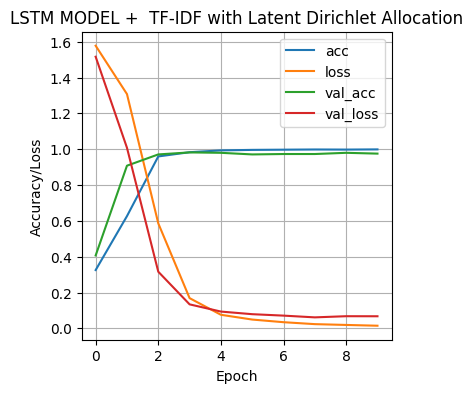

In [164]:
# ploty graph 
def plot_metric_graph(model, title):
    acc  = model.history.history['accuracy']
    loss = model.history.history['loss']
    val_acc  = model.history.history['val_accuracy']
    val_loss = model.history.history['val_loss']
    plt.figure(figsize=(4,4))
    plt.plot(acc)
    plt.plot(loss)
    plt.plot(val_acc)
    plt.plot(val_loss)
    plt.legend(labels=['acc', 'loss', 'val_acc', 'val_loss'])
    plt.ylabel('Accuracy/Loss')
    plt.xlabel('Epoch')
    plt.title(title)
    plt.grid()
    plt.show()
   
plot_metric_graph(lstm_lsa_model, 'LSTM MODEL +  TF-IDF with Latent Dirichlet Allocation')

In [165]:
pred = [np.argmax(pre) for pre in lstm_lsa_model.predict(lsa_X_test)]
report = classification_report(lsa_y_test, pred)
print(report)
lstm_lsa_result = {
    'accuracy':accuracy_score(lsa_y_test, pred), 
    'precision':precision_score(lsa_y_test, pred, average='weighted'),
    'recall': recall_score(lsa_y_test, pred,  average='weighted'), 
    'f1-score': f1_score(lsa_y_test, pred,  average='weighted')
}



pd.DataFrame(pd.Series(lstm_lsa_result))

14/14 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       102
           1       0.96      1.00      0.98        77
           2       0.98      0.95      0.96        84
           3       0.98      1.00      0.99       102
           4       1.00      0.94      0.97        80

    accuracy                           0.98       445
   macro avg       0.98      0.97      0.97       445
weighted avg       0.98      0.98      0.98       445



,0
accuracy,0.975281
precision,0.975683
recall,0.975281
f1-score,0.975170


Epoch 1/10
56/56 [==============================] - 1s 6ms/step - loss: 1.3668 - accuracy: 0.5281 - val_loss: 0.5813 - val_accuracy: 0.8337
Epoch 2/10
56/56 [==============================] - 0s 3ms/step - loss: 0.4979 - accuracy: 0.8567 - val_loss: 0.3934 - val_accuracy: 0.8809
Epoch 3/10
56/56 [==============================] - 0s 6ms/step - loss: 0.3780 - accuracy: 0.8837 - val_loss: 0.2821 - val_accuracy: 0.9169
Epoch 4/10
56/56 [==============================] - 0s 4ms/step - loss: 0.3179 - accuracy: 0.9045 - val_loss: 0.2725 - val_accuracy: 0.9191
Epoch 5/10
56/56 [==============================] - 0s 3ms/step - loss: 0.2895 - accuracy: 0.9107 - val_loss: 0.2303 - val_accuracy: 0.9371
Epoch 6/10
56/56 [==============================] - 0s 3ms/step - loss: 0.2843 - accuracy: 0.9084 - val_loss: 0.2285 - val_accuracy: 0.9393
Epoch 7/10
56/56 [==============================] - 0s 3ms/step - loss: 0.2860 - accuracy: 0.9107 - val_loss: 0.2437 - val_accuracy: 0.9281
Epoch 8/10
56/56 [==

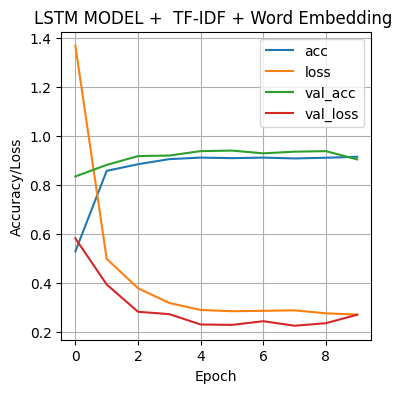

In [112]:
lstm_tfidfed_model.fit(tfidfed_X_train, tfidfed_y_train,validation_data=(tfidfed_X_test, tfidfed_y_test) , epochs=10)
plot_metric_graph(lstm_tfidfed_model, 'LSTM MODEL +  TF-IDF + Word Embedding ')

In [167]:
pred = [np.argmax(pre) for pre in lstm_tfidfed_model.predict(tfidfed_X_test)]
report = classification_report(tfidfed_y_test, pred)
print(report)
lstm_tfidfed_result = {
    'accuracy':accuracy_score(tfidfed_y_test, pred), 
    'precision':precision_score(tfidfed_y_test, pred, average='weighted'),
    'recall': recall_score(tfidfed_y_test, pred,  average='weighted'), 
    'f1-score': f1_score(tfidfed_y_test, pred,  average='weighted')
}



pd.DataFrame(pd.Series(lstm_tfidfed_result))

14/14 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       102
           1       0.95      0.95      0.95        77
           2       0.93      0.93      0.93        84
           3       1.00      0.98      0.99       102
           4       0.88      0.94      0.91        80

    accuracy                           0.95       445
   macro avg       0.94      0.95      0.94       445
weighted avg       0.95      0.95      0.95       445



,0
accuracy,0.946067
precision,0.947117
recall,0.946067
f1-score,0.946371


In [168]:
lstm_tfidf_model.fit(tfidf_X_train, tfidf_y_train,validation_data=(tfidf_X_test, tfidf_y_test) , epochs=10)

Epoch 1/10
56/56 [==============================] - 4s 39ms/step - loss: 1.4402 - accuracy: 0.4601 - val_loss: 1.0649 - val_accuracy: 0.6854
Epoch 2/10
56/56 [==============================] - 2s 37ms/step - loss: 0.7994 - accuracy: 0.7522 - val_loss: 0.4491 - val_accuracy: 0.9596
Epoch 3/10
56/56 [==============================] - 2s 44ms/step - loss: 0.3643 - accuracy: 0.9393 - val_loss: 0.1644 - val_accuracy: 0.9798
Epoch 4/10
56/56 [==============================] - 3s 49ms/step - loss: 0.1831 - accuracy: 0.9590 - val_loss: 0.0873 - val_accuracy: 0.9888
Epoch 5/10
56/56 [==============================] - 3s 56ms/step - loss: 0.1103 - accuracy: 0.9770 - val_loss: 0.0625 - val_accuracy: 0.9888
Epoch 6/10
56/56 [==============================] - 4s 66ms/step - loss: 0.0836 - accuracy: 0.9792 - val_loss: 0.0592 - val_accuracy: 0.9865
Epoch 7/10
56/56 [==============================] - 3s 46ms/step - loss: 0.0669 - accuracy: 0.9815 - val_loss: 0.0483 - val_accuracy: 0.9910
Epoch 8/10
56

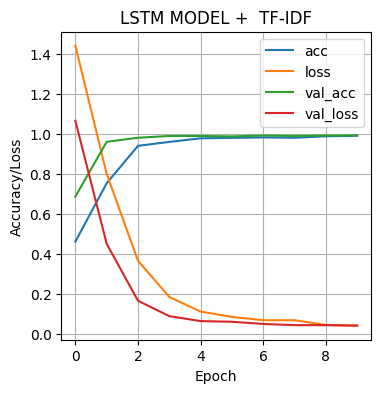

In [169]:
plot_metric_graph(lstm_tfidf_model, 'LSTM MODEL +  TF-IDF')

In [170]:
pred = [np.argmax(pre) for pre in lstm_tfidf_model.predict(tfidf_X_test)]
report = classification_report(tfidf_y_test, pred)
print(report)
lstm_tfidf_result = {
    'accuracy':accuracy_score(tfidf_y_test, pred), 
    'precision':precision_score(tfidf_y_test, pred, average='weighted'),
    'recall': recall_score(tfidf_y_test, pred,  average='weighted'), 
    'f1-score': f1_score(tfidf_y_test, pred,  average='weighted')
}



pd.DataFrame(pd.Series(lstm_tfidf_result))

14/14 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       1.00      0.99      0.99        77
           2       0.97      1.00      0.98        84
           3       1.00      1.00      1.00       102
           4       1.00      0.99      0.99        80

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



,0
accuracy,0.991011
precision,0.991221
recall,0.991011
f1-score,0.991039


In [171]:
lsa_X_test.shape

(445, 300)

#### LSTM MODEL with Attention

In [211]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, GlobalAveragePooling1D, Multiply, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define parameters
max_length = 50
vocab_size = 10000 
embedding_dim = 128
num_classes = 5

# Input layer
inputs = Input(shape=(max_length,))
# Embedding layer
embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)
# LSTM layer
lstm = LSTM(64, return_sequences=True)(embedding)
# Attention mechanism 
attention = Dense(1, activation='tanh')(lstm)
attention_weights = Activation('softmax')(attention)
context_vector = Multiply()([lstm, attention_weights])
# Global average pooling to reduce dimensions
pooled = GlobalAveragePooling1D()(context_vector)
# Fully connected layers
dense1 = Dense(32, activation='relu')(pooled)
outputs = Dense(num_classes, activation='sigmoid')(dense1)
# Define Model
simple_lstm_attention_model = Model(inputs=inputs, outputs=outputs)
# model compilation... 
simple_lstm_attention_model.compile(optimizer=Adam(learning_rate=0.008),
                                   loss='sparse_categorical_crossentropy',
                                   metrics=['accuracy'])
# Model Summary
simple_lstm_attention_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding_7 (Embedding)        (None, 50, 128)      1280000     ['input_8[0][0]']                
                                                                                                  
 lstm_7 (LSTM)                  (None, 50, 64)       49408       ['embedding_7[0][0]']            
                                                                                                  
 dense_33 (Dense)               (None, 50, 1)        65          ['lstm_7[0][0]']                 
                                                                                            

In [195]:
sample = np.expand_dims(lsa_X_test[7], axis=0)

In [196]:
simple_lstm_attention_model.predict(sample)

1/1 [==============================] - 1s 1s/step


array([[0.49811122, 0.49765533, 0.49464065, 0.5017759 , 0.50022   ]],
      dtype=float32)

In [201]:
tfidfed_X_train.shape

(1780, 50)

In [205]:
# simple_lstm_attention_model.fit(lsa_X_train, lsa_y_train,validation_data=(lsa_X_test, lsa_y_test) , epochs=10)

In [213]:
# simple_lstm_attention_model.fit(tfidfed_X_train, tfidfed_y_train,validation_data=(tfidfed_X_test, tfidfed_y_test) , epochs=10)

In [ ]:
pred = [np.argmax(pre) for pre in simple_lstm_attention_model.predict(tfidfed_X_test)]
report = classification_report(tfidfed_y_test, pred)
print(report)
simple_lstm_attention_model_result = {
    'accuracy':accuracy_score(tfidfed_y_test, pred), 
    'precision':precision_score(tfidfed_y_test, pred, average='weighted'),
    'recall': recall_score(tfidfed_y_test, pred,  average='weighted'), 
    'f1-score': f1_score(tfidfed_y_test, pred,  average='weighted')
}



pd.DataFrame(pd.Series(simple_lstm_attention_model_result))

In [ ]:
# result summary table

In [ ]:
lstm_lsa_result
lstm_tfidfed_result
lstm_tfidf_result
simple_lstm_attention_model_result

In [81]:
final_result = pd.DataFrame([lstm_lsa_result, lstm_tfidfed_result, lstm_tfidf_result, simple_lstm_attention_model_result])
final_result['model'] = ['LSTM + TFID & LDA', 'LSTM + TFIDF & W2V', 'LSTM + TFIDF', 'LSTM + ATTENTION LAYER']
final_result

,accuracy,precision,recall,f1-score,model
0,0.979775,0.980178,0.979775,0.979711,LSTM + TFID & LDA
1,0.921348,0.927653,0.921348,0.921219,LSTM + TFIDF & W2V
2,0.988764,0.989017,0.988764,0.988778,LSTM + TFIDF
3,0.871910,0.873552,0.871910,0.871905,LSTM + ATTENTION LAYER


In [82]:
final_result.to_csv('result.csv')

Text(0.5, 0, 'techniques')

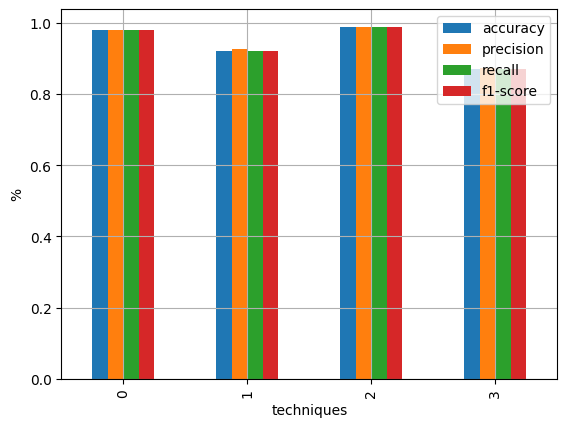

In [84]:
final_result.plot(kind='bar')
plt.grid()
plt.ylabel('%')
plt.xlabel('techniques')

### BERT MODEL.. 

In [49]:
# clean_dataset

In [50]:
clean_dataset.sample(3)

,category,stem_clean_text,lem_clean_text,doc,lbl
877,tech,"[nintendo, handheld, given, euro, date, ninten...","[nintendo, handheld, given, euro, date, ninten...",nintendo handheld given euro date nintendo new...,4
1061,entertainment,"[park, sell, day, ticket, scotland, biggest, m...","[park, sell, day, ticket, scotland, biggest, m...",park sell day ticket scotland biggest music fe...,1
2112,business,"[ail, eurodisney, vow, turnaround, eurodisney,...","[ailing, eurodisney, vow, turnaround, eurodisn...",ailing eurodisney vow turnaround eurodisney eu...,0


In [93]:
# !pip install tensorflow_hub tensorflow_text

In [51]:
import os
os.environ["TFHUB_CACHE_DIR"] = r'C:\Users\HP\Documents\PYTHON CODE\GitHub\Artificial Intelligent Models\BERT_MODEL\saved_model'

In [66]:
import tensorflow_hub as hub 
import tensorflow_text as txt 
from sklearn import model_selection

In [54]:
preprocessed_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
bert_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'

In [57]:
preprocessor = hub.KerasLayer(preprocessed_url)
bert= hub.KerasLayer(bert_url)

In [58]:
sample_text = ['this is a good boy', 'this is a good girl'] 
pre_obj = preprocessor(sample_text)
pre_obj.keys()

dict_keys(['input_mask', 'input_word_ids', 'input_type_ids'])

In [61]:
# pre_obj

In [64]:
X, y = clean_dataset['doc'] , clean_data['lbl']
X.sample(3)

257    sporting rival go extra time current slew spor...
76     yukos sue four firm 20bn russian oil firm yuko...
557    u bank bos hail genius smith u federal reserve...
Name: doc, dtype: object

In [67]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)
X_train

685     iraq afghanistan wto talk world trade organisa...
1574    game deserve place class computer game could e...
1535    richard judy choose top book 10 author shortli...
1434    bee handed potential man utd tie brentford fac...
381     euniversity disgraceful waste failed governmen...
                              ...                        
1513    robotic pod take car design new breed wearable...
1525    tory attack eu asylum move david blunkett accu...
1643    u economy still growing say fed area u saw eco...
605     parry firm gerrard listen full interview sport...
1695    new yob target unveiled fifty new area getting...
Name: doc, Length: 1668, dtype: object

In [70]:
# loading input layer with bert preprocessor 
input_layer = tf.keras.layers.Input(shape=() , dtype=tf.string, name='text')

# bert layer
encoder_input = preprocessor(input_layer)
encoder = bert(encoder_input)

# keras layer 
lo = tf.keras.layers.Dropout(0.1, name='droplayer')(encoder['pooled_output'])
fo  = tf.keras.layers.Dense(5, activation='softmax', name='denselayer')(lo)

# model building
model = tf.keras.Model(inputs = [input_layer], outputs=[fo])

In [75]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [76]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train , y_train, validation_data= (X_test, y_test),  epochs=10)

Epoch 1/10
53/53 [==============================] - 1036s 20s/step - loss: 1.2253 - accuracy: 0.5612 - val_loss: 1.0687 - val_accuracy: 0.7612
Epoch 2/10
53/53 [==============================] - 945s 18s/step - loss: 1.0403 - accuracy: 0.6721 - val_loss: 0.9412 - val_accuracy: 0.7056
Epoch 3/10
53/53 [==============================] - 810s 15s/step - loss: 0.8944 - accuracy: 0.7626 - val_loss: 0.8461 - val_accuracy: 0.8115
Epoch 4/10
53/53 [==============================] - 916s 17s/step - loss: 0.8074 - accuracy: 0.7998 - val_loss: 0.7351 - val_accuracy: 0.8618
Epoch 5/10
53/53 [==============================] - 920s 17s/step - loss: 0.7209 - accuracy: 0.8309 - val_loss: 0.6734 - val_accuracy: 0.8582
Epoch 6/10
53/53 [==============================] - 768s 15s/step - loss: 0.6630 - accuracy: 0.8393 - val_loss: 0.6237 - val_accuracy: 0.8582
Epoch 7/10
53/53 [==============================] - 785s 15s/step - loss: 0.6087 - accuracy: 0.8537 - val_loss: 0.5693 - val_accuracy: 0.8815
Epoch

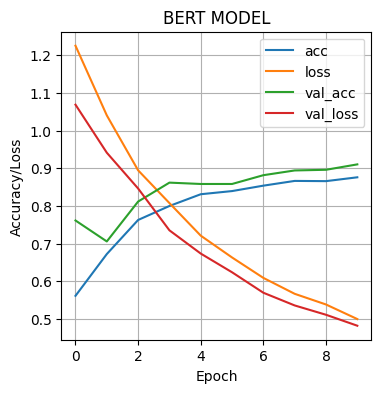

In [77]:
# ploty graph 

def plot_metric_graph(model, title):
    acc  = model.history.history['accuracy']
    loss = model.history.history['loss']
    val_acc  = model.history.history['val_accuracy']
    val_loss = model.history.history['val_loss']

    plt.figure(figsize=(4,4))
    plt.plot(acc)
    plt.plot(loss)
    plt.plot(val_acc)
    plt.plot(val_loss)
    plt.legend(labels=['acc', 'loss', 'val_acc', 'val_loss'])
    plt.ylabel('Accuracy/Loss')
    plt.xlabel('Epoch')
    plt.title(title)
    plt.grid()
    plt.show()
   

plot_metric_graph(model, 'BERT MODEL')


In [80]:
pred = [np.argmax(pre) for pre in model.predict(X_test)]
pred

18/18 [==============================] - 251s 14s/step


1336    west end honour finest show west end honouring...
Name: doc, dtype: object

In [105]:
report = classification_report(y_test, pred)
print(report)

bert_model_result = {
    'accuracy':accuracy_score(y_test, pred), 
    'precision':precision_score(y_test, pred, average='weighted'),
    'recall': recall_score(y_test, pred,  average='weighted'), 
    'f1-score': f1_score(y_test, pred,  average='weighted')
}



pd.DataFrame(pd.Series(bert_model_result))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       123
           1       0.96      0.94      0.95        93
           2       0.93      0.90      0.91       105
           3       0.93      0.99      0.96       130
           4       0.83      0.89      0.86       106

    accuracy                           0.91       557
   macro avg       0.91      0.91      0.91       557
weighted avg       0.91      0.91      0.91       557



,0
accuracy,0.910233
precision,0.911069
recall,0.910233
f1-score,0.909923


In [107]:
bert_result = pd.DataFrame(pd.Series(bert_model_result))
bert_result

,0
accuracy,0.910233
precision,0.911069
recall,0.910233
f1-score,0.909923


In [110]:
bert_result.transpose().to_csv('bert_result.csv')

In [111]:
bert_result.transpose()

,accuracy,precision,recall,f1-score
0,0.910233,0.911069,0.910233,0.909923


,0
accuracy,0.910233
precision,0.911069
recall,0.910233
f1-score,0.909923


In [218]:
# load data and analyze .. 
bert_mdl = pd.read_csv('bert_result.csv')
bert_mdl['model'] = ['BERT']
bert_mdl

,Unnamed: 0,accuracy,precision,recall,f1-score,model
0,0,0.910233,0.911069,0.910233,0.909923,BERT


In [217]:
other_mdl = pd.read_csv('result.csv')
other_mdl

,Unnamed: 0,accuracy,precision,recall,f1-score,model
0,0,0.979775,0.980178,0.979775,0.979711,LSTM + TFID & LDA
1,1,0.921348,0.927653,0.921348,0.921219,LSTM + TFIDF & W2V
2,2,0.988764,0.989017,0.988764,0.988778,LSTM + TFIDF
3,3,0.871910,0.873552,0.871910,0.871905,LSTM + ATTENTION LAYER


In [219]:
final_analysis = pd.concat([other_mdl, bert_mdl])
final_analysis

,Unnamed: 0,accuracy,precision,recall,f1-score,model
0,0,0.979775,0.980178,0.979775,0.979711,LSTM + TFID & LDA
1,1,0.921348,0.927653,0.921348,0.921219,LSTM + TFIDF & W2V
2,2,0.988764,0.989017,0.988764,0.988778,LSTM + TFIDF
3,3,0.871910,0.873552,0.871910,0.871905,LSTM + ATTENTION LAYER
0,0,0.910233,0.911069,0.910233,0.909923,BERT


In [221]:
final_analysis.drop(columns=['Unnamed: 0'], inplace=True)

In [222]:
final_analysis

,accuracy,precision,recall,f1-score,model
0,0.979775,0.980178,0.979775,0.979711,LSTM + TFID & LDA
1,0.921348,0.927653,0.921348,0.921219,LSTM + TFIDF & W2V
2,0.988764,0.989017,0.988764,0.988778,LSTM + TFIDF
3,0.871910,0.873552,0.871910,0.871905,LSTM + ATTENTION LAYER
0,0.910233,0.911069,0.910233,0.909923,BERT


In [225]:
# final_analysis.plot(kind='bar')

In [231]:
cols = final_analysis.columns[:-1]
final_analysis[cols] = final_analysis[cols].apply(lambda x: x * 100)
final_analysis

,accuracy,precision,recall,f1-score,model
0,97.977528,98.017842,97.977528,97.971081,LSTM + TFID & LDA
1,92.134831,92.765288,92.134831,92.121854,LSTM + TFIDF & W2V
2,98.876404,98.901685,98.876404,98.877814,LSTM + TFIDF
3,87.191011,87.355154,87.191011,87.190507,LSTM + ATTENTION LAYER
0,91.023339,91.106853,91.023339,90.992276,BERT


In [234]:
# export final result.... 
final_analysis.to_excel('final_result.xlsx')

In [235]:
final_analysis.transpose().to_excel('final_result2.xlsx')